e :  Message: no such element: Unable to locate element: {"method":"css selector","selector":".sFlh5c.pT0Scc.iPVvYb"}
  (Session info: chrome=123.0.6312.59); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7BD2270C2+63090]
	(No symbol) [0x00007FF7BD192D12]
	(No symbol) [0x00007FF7BD02EC65]
	(No symbol) [0x00007FF7BD07499D]
	(No symbol) [0x00007FF7BD074ADC]
	(No symbol) [0x00007FF7BD0B5B37]
	(No symbol) [0x00007FF7BD09701F]
	(No symbol) [0x00007FF7BD0B3412]
	(No symbol) [0x00007FF7BD096D83]
	(No symbol) [0x00007FF7BD0683A8]
	(No symbol) [0x00007FF7BD069441]
	GetHandleVerifier [0x00007FF7BD62262D+4238301]
	GetHandleVerifier [0x00007FF7BD65F78D+4488509]
	GetHandleVerifier [0x00007FF7BD657A6F+4456479]
	GetHandleVerifier [0x00007FF7BD300606+953270]
	(No symbol) [0x00007FF7BD19E5DF]
	(No symbol) [0x00007FF7BD1992B4]
	(No symbol) [0x00007FF7BD1993EB]
	(No s
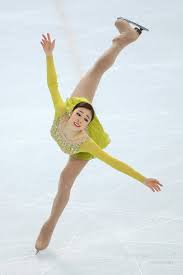

In [4]:
import os
import ssl
import time
import urllib.request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

ssl._create_default_https_context = ssl._create_unverified_context # # ssl인증을 거쳐갈 임시 context 생성해줌 (인증서 검증 비활성화)

driver = webdriver.Chrome()
url = 'https://www.google.com/imghp?hl=ko&tab=ri&ogbl'
driver.get(url) # url 접속

keyword = '김연아' # 검색 키워드 지정

save_dir = f"imgs/{keyword}_images"
os.makedirs(save_dir, exist_ok=True) # 디렉토리 생성 (이미 존재하면 무시)

element = driver.find_element('name', 'q') # 요소(검색창) 찾기
element.send_keys(keyword) # 요소에 값(검색어) 전달
element.send_keys(Keys.RETURN) # 요소에 값(엔터) 전달


scroll_pause_sec = 1 # 스크롤 후 기다릴 시간 지정

last_height = driver.execute_script("return document.body.scrollHeight") # 현재 페이지 높이 반환

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # 스크롤 내리기
    time.sleep(scroll_pause_sec) # 지정한 초만큼 페이지 로딩 기다리기
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:        
            driver.find_element(By.CSS_SELECTOR, ".mye4qd").click() 
        except:
            break
    last_height = new_height

image_elements = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
count = 1

for image in image_elements:
    try:
        image.click()
        time.sleep(0.5)
        
        imgUrl = driver.find_element(By.CSS_SELECTOR, ".sFlh5c.pT0Scc.iPVvYb").get_attribute("src")

        opener = urllib.request.build_opener()
        opener.addheaders = [
            ('User-Agent',
             'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
        ]
        urllib.request.install_opener(opener)
        urllib.request.urlretrieve(imgUrl, f'imgs/{keyword}_images/img{str(count)}.jpg')
        count = count + 1
    except Exception as e:
        print('e : ', e)
        pass

driver.close()